In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#Датасет, создание меток
s5data = pd.read_csv('s5.csv')
print(s5data)

            x        y  group
0    0.004814  0.42148      1
1   -0.084563  0.35955      1
2   -0.430350  0.11529      1
3    0.755080  1.00950      1
4    0.556150  0.86155      1
..        ...      ...    ...
295 -0.086462  0.44886     15
296 -0.081758  0.45650     15
297 -0.053442  0.47265     15
298 -0.070159  0.45759     15
299 -0.088039  0.46253     15

[300 rows x 3 columns]


#Метрики для сравнения

Методы небинарной (многоклассовой) классификации применяются в случае, когда у вас есть более двух классов, и вы хотите прогнозировать, к какому классу будет отнесен объект. Вот некоторые распространенные методы небинарной классификации:

Многоклассовая логистическая регрессия (Softmax регрессия): Это обобщение бинарной логистической регрессии на многоклассовый случай. Она использует функцию Softmax для преобразования выходов в вероятности и выбора наиболее вероятного класса.

Метод опорных векторов (SVM): SVM может быть расширен на многоклассовую классификацию с использованием стратегии "один против всех" (one-vs-all) или "один против одного" (one-vs-one).


Многоклассовый наивный байесовский классификатор: Наивный байесовский классификатор может быть расширен на многоклассовую классификацию.

Деревья решений и случайный лес: Деревья решений могут быть использованы для многоклассовой классификации, а случайный лес представляет собой ансамбль деревьев решений.

Градиентный бустинг: Градиентный бустинг, также представленный, например, XGBoost и LightGBM, может быть адаптирован для многоклассовой классификации.

Нейронные сети: Многоклассовая классификация также может быть реализована с использованием нейронных сетей, особенно с использованием многоклассовых функций активации (например, Softmax на выходном слое).

Каждый из этих методов имеет свои преимущества и недостатки, и выбор зависит от конкретной задачи, характеристик данных и требований.

##Сами метрики

In [ ]:
def r2score(y_true, y_pred):
    mean_y_true = np.mean(y_true)
    r2 = 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)
    return round(r2, 3)

def adj_r2score(y_true, y_pred, n, k):
 r2 = 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)
 adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
 return round(adjusted_r2, 3)

def aic(y_true, y_pred, k):
    mse = np.mean((y_true - y_pred) ** 2)
    pravdob = 1 / np.sqrt(2 * np.pi * mse) * np.exp(-0.5 * (y_true - y_pred) ** 2 / mse)
    aic = 2 * k - 2 * np.sum(np.log(pravdob))
    return round(aic, 3)

def aicc(aic, k, n):
    aicc = aic + 2 * k * (k + 1) / (n - k - 1)
    return round(aicc, 3)

def bic(y_true, y_pred, k, n):
    mse = np.mean((y_true - y_pred) ** 2)
    pravdob = 1 / np.sqrt(2 * np.pi * mse) * np.exp(-0.5 * (y_true - y_pred) ** 2 / mse)
    bic = -2 * np.sum(np.log(pravdob)) + k * np.log(n)
    return round(bic, 3)

def mse_s(y_true, y_pred):
    return round(np.mean((y_true - y_pred) ** 2), 3)

def rmse_s(y_true, y_pred):
    return round(np.sqrt(mse_s(y_true, y_pred)), 3)

def mae_s(y_true, y_pred):
    return round(np.mean(np.abs(y_true - y_pred)), 3)

def mape_s(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 3)

def smape_s(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return round(np.mean(diff) * 100, 3)

def wape_s(y_true, y_pred, weights):
    return round(np.sum(np.abs(y_true - y_pred) * weights) / np.sum(np.abs(y_true) * weights) * 100, 2)

def accuracy_s(tp,tn,fp,fn):
    return round((tp+tn)/(tp+tn+fp+fn),2)

def precision_s(tp,fp):
    return round(tp/(tp+fp),2)

def recall_s(tp,fn):
    return round(tp/(tp+fn),2)

def f1_score(tp,tn,fp,fn):
    p = precision_s(tp,fp)
    r = recall_s(tp,fn)
    return round(2*(p*r)/(p+r),2)

##Классификация

###Метод ближайших соседей (knn)

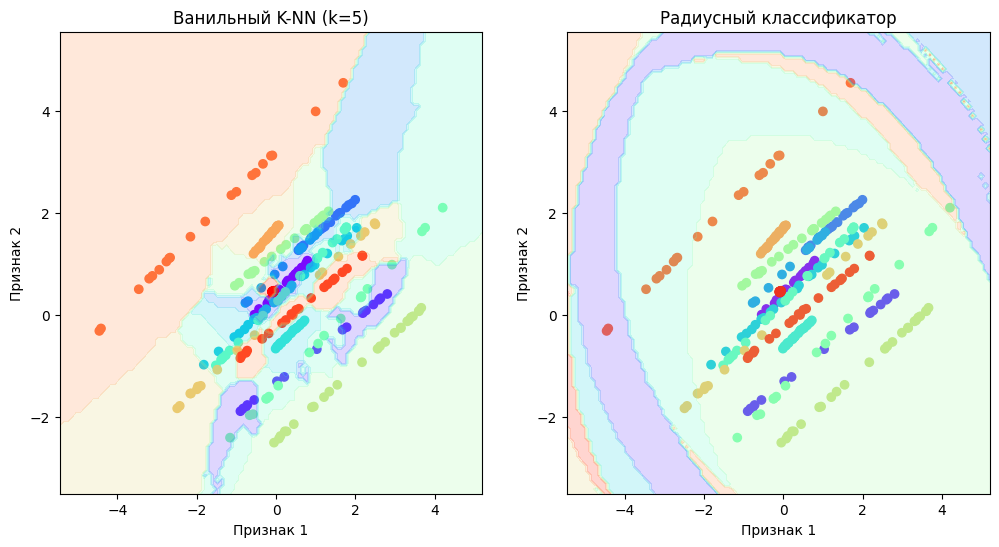

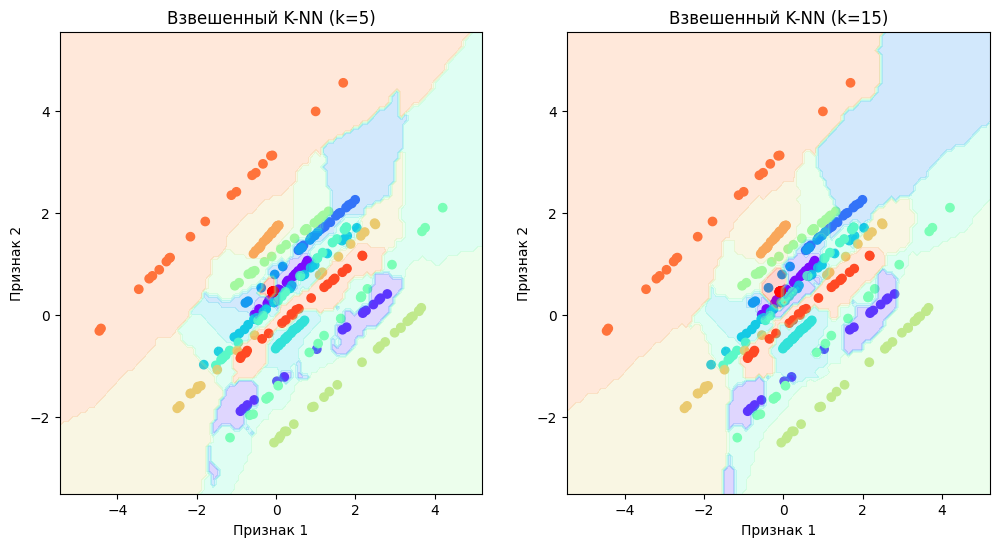

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, RadiusNeighborsClassifier, RadiusNeighborsRegressor
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

X = s5data[['x','y']]
y = s5data['group']
# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n = len(y_test)
k = X.shape[1]

# К-NN для классификации без изменений (k=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X)

met_value_class = {
    'Метрика': ['R2 score', 'Adjusted R-squared', 'AIC', 'AICC','BIC',
               'MSE','RMSE','MAE','MAPE %','SMAPE %'],
    'Классик knn(5)': [r2score(y, y_pred),
                 adj_r2score(y, y_pred,n,k),
                 aic(y, y_pred, k),
                 aicc(aic(y, y_pred, k), k, n),
                 bic(y, y_pred, k, n),
                 mse_s(y, y_pred),
                 rmse_s(y, y_pred),
                 mae_s(y, y_pred),
                 mape_s(y, y_pred),
                 smape_s(y, y_pred)]

}

# Радиусный классификатор (радиус=3)
radius_classifier = RadiusNeighborsClassifier(radius=6)
radius_classifier.fit(X_train, y_train)

y_pred = radius_classifier.predict(X)

met_value_class['Радиусный(3)'] = [
    r2score(y, y_pred),
    adj_r2score(y, y_pred, n, k),
    aic(y, y_pred, k),
    aicc(aic(y, y_pred, k), k, n),
    bic(y, y_pred, k, n),
    mse_s(y, y_pred),
    rmse_s(y, y_pred),
    mae_s(y, y_pred),
    mape_s(y, y_pred),
    smape_s(y, y_pred)
]
# Взвешенный K-NN с k=5
weighted_knn_5 = KNeighborsClassifier(n_neighbors=5, weights='distance')
weighted_knn_5.fit(X_train, y_train)

y_pred = weighted_knn_5.predict(X)

met_value_class['Взвешенный knn(5)'] = [
    r2score(y, y_pred),
    adj_r2score(y, y_pred, n, k),
    aic(y, y_pred, k),
    aicc(aic(y, y_pred, k), k, n),
    bic(y, y_pred, k, n),
    mse_s(y, y_pred),
    rmse_s(y, y_pred),
    mae_s(y, y_pred),
    mape_s(y, y_pred),
    smape_s(y, y_pred)
]
# Взвешенный K-NN с k=15
weighted_knn_20 = KNeighborsClassifier(n_neighbors=15, weights='distance')
weighted_knn_20.fit(X_train, y_train)

y_pred = weighted_knn_20.predict(X)

met_value_class['Взвешенный knn(15)'] = [
    r2score(y, y_pred),
    adj_r2score(y, y_pred, n, k),
    aic(y, y_pred, k),
    aicc(aic(y, y_pred, k), k, n),
    bic(y, y_pred, k, n),
    mse_s(y, y_pred),
    rmse_s(y, y_pred),
    mae_s(y, y_pred),
    mape_s(y, y_pred),
    smape_s(y, y_pred)
]
# Визуализация данных и границы принятия решений (k-NN без изменений)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("Ванильный K-NN (k=5)")
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='rainbow', marker='o')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

xx, yy = np.meshgrid(np.linspace(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1, 100),
                     np.linspace(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1, 100))
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='rainbow')
plt.xlim(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1)
plt.ylim(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1)

# Визуализация данных и границы принятия решений (радиусный классификатор)
plt.subplot(122)
plt.title("Радиусный классификатор")
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='rainbow', marker='o')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

xx, yy = np.meshgrid(np.linspace(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1, 100),
                     np.linspace(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1, 100))
Z = radius_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='rainbow')
plt.xlim(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1)
plt.ylim(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1)

plt.show()

# Визуализация данных и границ принятия решений (взвешенный K-NN с k=5)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("Взвешенный K-NN (k=5)")
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='rainbow', marker='o')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

xx, yy = np.meshgrid(np.linspace(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1, 100),
                     np.linspace(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1, 100))
Z = weighted_knn_5.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='rainbow')
plt.xlim(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1)
plt.ylim(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1)

# Визуализация данных и границ принятия решений (взвешенный K-NN с k=15)
plt.subplot(122)
plt.title("Взвешенный K-NN (k=15)")
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='rainbow', marker='o')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

Z = weighted_knn_20.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='rainbow')
plt.xlim(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1)
plt.ylim(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1)

plt.show()


###Градиентный бустинг

Градиентный бустинг Accuracy: 0.65
Градиентный бустинг Accuracy: 0.93


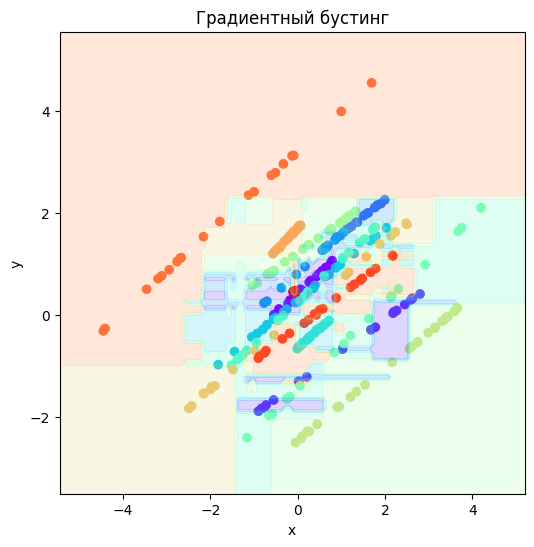

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
from sklearn.metrics import accuracy_score

# Классификатор градиентного бустинга
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)

# Прогнозы для всего набора данных
y_pred_gb = gb_classifier.predict(X)
y_pred_gb_test = gb_classifier.predict(X_test)
# Сбор метрик для классификации
met_value_class['Градиентный бустинг'] = [
    r2score(y, y_pred_gb),
    adj_r2score(y, y_pred_gb, n, k),
    aic(y, y_pred_gb, k),
    aicc(aic(y, y_pred_gb, k), k, n),
    bic(y, y_pred_gb, k, n),
    mse_s(y, y_pred_gb),
    rmse_s(y, y_pred_gb),
    mae_s(y, y_pred_gb),
    mape_s(y, y_pred_gb),
    smape_s(y, y_pred_gb)
]

# Визуализация данных и границы принятия решений (градиентный бустинг)
plt.figure(figsize=(6, 6))
plt.title("Градиентный бустинг")
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='rainbow', marker='o')
plt.xlabel('x')
plt.ylabel('y')

xx, yy = np.meshgrid(np.linspace(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1, 100),
                     np.linspace(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1, 100))
Z = gb_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='rainbow')
plt.xlim(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1)
plt.ylim(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred_gb_test)
print(f"Градиентный бустинг Accuracy: {accuracy}")
accuracy = accuracy_score(y, y_pred_gb)
print(f"Градиентный бустинг Accuracy: {accuracy}")

plt.show()


In [ ]:
met_value_class = pd.DataFrame(met_value_class)
met_value_class

Метрика  Классик knn(5)  Радиусный(3)  Взвешенный knn(5)  \
0            R2 score           0.749        -0.275              0.960   
1  Adjusted R-squared           0.741        -0.319              0.959   
2                 AIC        1311.654      1799.642            760.950   
3                AICC        1311.865      1799.853            761.161   
4                 BIC        1315.843      1803.830            765.139   
5                 MSE           4.577        23.280              0.730   
6                RMSE           2.139         4.825              0.854   
7                 MAE           0.777         4.013              0.150   
8              MAPE %          18.286       134.338              3.420   
9             SMAPE %          15.758        53.126              2.782   

   Взвешенный knn(15)  Градиентный бустинг  
0               0.916                0.852  
1               0.913                0.847  
2             983.596             1153.709  
3             983.807             1153.920  
4             987.785             1157.897  
5               1.533                2.703  
6               1.238                1.644  
7               0.213                0.377  
8               8.293               10.189  
9               3.425                5.827

##Регрессия

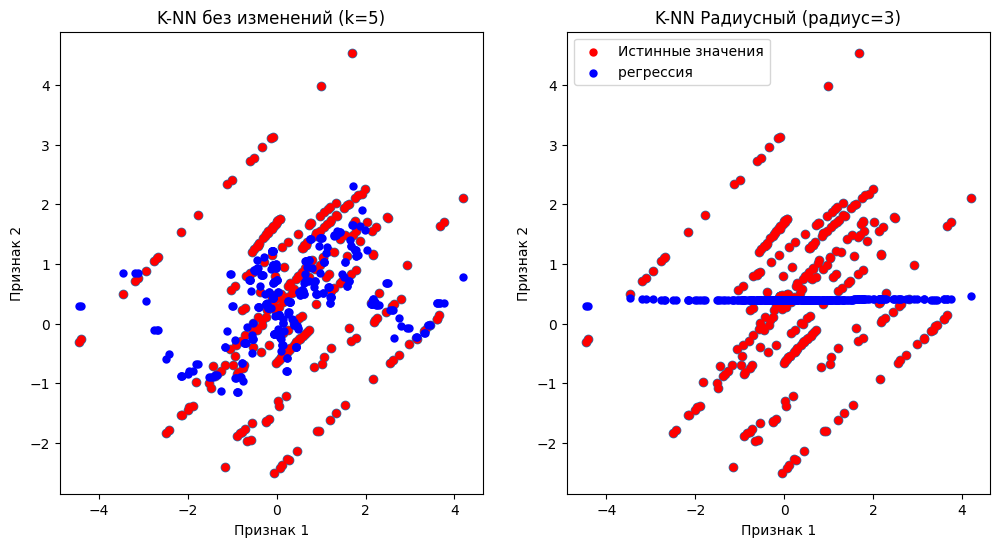

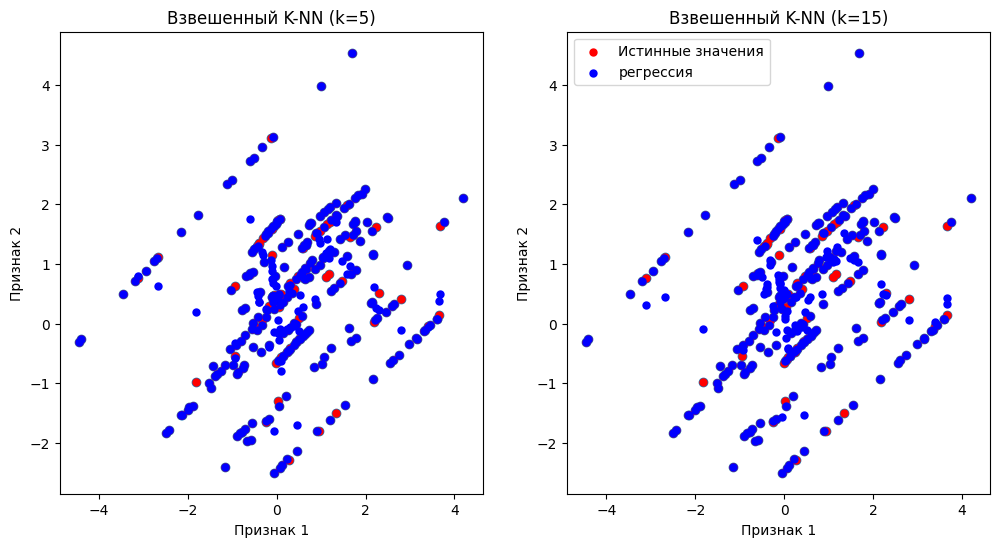

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
from sklearn.metrics import accuracy_score

X = s5data[['x']]
y = s5data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-NN для регрессии без изменений (k=5)
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X)

# Визуализация данных и графики регрессии (K-NN без изменений)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("K-NN без изменений (k=5)")
plt.scatter(X, y, cmap='rainbow', marker='o')
plt.scatter(X.iloc[:, 0], y, color='red', linewidth=0.01, label='Истинные значения')
plt.scatter(X.iloc[:, 0], y_pred, color='blue', linewidth=0.01, label='регрессия ')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

met_value_reg = {
    'Метрика': ['R2 score', 'Adjusted R-squared', 'AIC', 'AICC','BIC',
               'MSE','RMSE','MAE','MAPE %','SMAPE %'],
    'K-NN регрессия (k=5)': [r2score(y, y_pred),
                 adj_r2score(y, y_pred,n,k),
                 aic(y, y_pred, k),
                 aicc(aic(y, y_pred, k), k, n),
                 bic(y, y_pred, k, n),
                 mse_s(y, y_pred),
                 rmse_s(y, y_pred),
                 mae_s(y, y_pred),
                 mape_s(y, y_pred),
                 smape_s(y, y_pred)]

}

# Радиусный регрессор (радиус=3)
radius_regressor = RadiusNeighborsRegressor(radius=6)
radius_regressor.fit(X_train, y_train)

y_pred = radius_regressor.predict(X)

# Визуализация данных и графики регрессии (K-NN без изменений)
plt.subplot(122)
plt.title("K-NN Радиусный (радиус=3)")
plt.scatter(X, y, cmap='rainbow', marker='o')
plt.scatter(X.iloc[:, 0], y, color='red', linewidth=0.01, label='Истинные значения')
plt.scatter(X.iloc[:, 0], y_pred, color='blue', linewidth=0.01, label='регрессия ')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()

met_value_reg['Радиусная регрессия (3)'] = [
    r2score(y, y_pred),
    adj_r2score(y, y_pred, n, k),
    aic(y, y_pred, k),
    aicc(aic(y, y_pred, k), k, n),
    bic(y, y_pred, k, n),
    mse_s(y, y_pred),
    rmse_s(y, y_pred),
    mae_s(y, y_pred),
    mape_s(y, y_pred),
    smape_s(y, y_pred)
]

# Взвешенный K-NN для регрессии с k=5
weighted_knn_5 = KNeighborsRegressor(n_neighbors=5, weights='distance')
weighted_knn_5.fit(X_train, y_train)

y_pred = weighted_knn_5.predict(X)

# Визуализация данных и графики регрессии (K-NN без изменений)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("Взвешенный K-NN (k=5)")
plt.scatter(X, y, cmap='rainbow', marker='o')
plt.scatter(X.iloc[:, 0], y, color='red', linewidth=0.01, label='Истинные значения')
plt.scatter(X.iloc[:, 0], y_pred, color='blue', linewidth=0.01, label='регрессия ')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

met_value_reg['Взвешенный K-NN регрессия (5)'] = [
    r2score(y, y_pred),
    adj_r2score(y, y_pred, n, k),
    aic(y, y_pred, k),
    aicc(aic(y, y_pred, k), k, n),
    bic(y, y_pred, k, n),
    mse_s(y, y_pred),
    rmse_s(y, y_pred),
    mae_s(y, y_pred),
    mape_s(y, y_pred),
    smape_s(y, y_pred)
]

# Взвешенный K-NN для регрессии с k=15
weighted_knn_15 = KNeighborsRegressor(n_neighbors=15, weights='distance')
weighted_knn_15.fit(X_train, y_train)

y_pred = weighted_knn_15.predict(X)

# Визуализация данных и графики регрессии (K-NN без изменений)
plt.subplot(122)
plt.title("Взвешенный K-NN (k=15)")
plt.scatter(X, y, cmap='rainbow', marker='o')
plt.scatter(X.iloc[:, 0], y, color='red', linewidth=0.01, label='Истинные значения')
plt.scatter(X.iloc[:, 0], y_pred, color='blue', linewidth=0.01, label='регрессия')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()

met_value_reg['Взвешенный K-NN регрессия (15)'] = [
    r2score(y, y_pred),
    adj_r2score(y, y_pred, n, k),
    aic(y, y_pred, k),
    aicc(aic(y, y_pred, k), k, n),
    bic(y, y_pred, k, n),
    mse_s(y, y_pred),
    rmse_s(y, y_pred),
    mae_s(y, y_pred),
    mape_s(y, y_pred),
    smape_s(y, y_pred)
]


###Градиентный бустинг

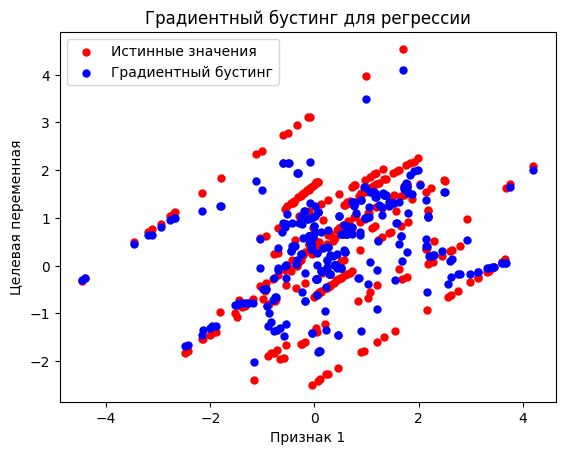

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

X = s5data[['x']]
y = s5data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Регрессор градиентного бустинга
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_regressor.fit(X_train, y_train)

# Прогнозы для всего набора данных
y_pred_gb_reg = gb_regressor.predict(X)

# Сбор метрик для регрессии
met_value_reg ['Градиентный бустинг'] = [
        r2score(y, y_pred_gb_reg),
        adj_r2score(y, y_pred_gb_reg, len(y), X.shape[1]),
        aic(y, y_pred_gb_reg, X.shape[1]),
        aicc(aic(y, y_pred_gb_reg, X.shape[1]), X.shape[1], len(y)),
        bic(y, y_pred_gb_reg, X.shape[1], len(y)),
        mse_s(y, y_pred_gb_reg),
        rmse_s(y, y_pred_gb_reg),
        mae_s(y, y_pred_gb_reg),
        mape_s(y, y_pred_gb_reg),
        smape_s(y, y_pred_gb_reg)
    ]


# Визуализация данных и регрессионных предсказаний (градиентный бустинг)
plt.scatter(X.iloc[:, 0], y, color='red', linewidth=0.01, label='Истинные значения')
plt.scatter(X.iloc[:, 0], y_pred_gb_reg, color='blue', linewidth=0.01, label='Градиентный бустинг')
plt.title('Градиентный бустинг для регрессии')
plt.xlabel('Признак 1')
plt.ylabel('Целевая переменная')
plt.legend()
plt.show()



In [ ]:
met_value_reg = pd.DataFrame(met_value_reg)
met_value_reg

Метрика  K-NN регрессия (k=5)  Радиусная регрессия (3)  \
0            R2 score                 0.263                    0.002   
1  Adjusted R-squared                 0.237                   -0.033   
2                 AIC               861.545                  952.340   
3                AICC               861.756                  952.551   
4                 BIC               865.733                  956.529   
5                 MSE                 1.021                    1.382   
6                RMSE                 1.010                    1.176   
7                 MAE                 0.764                    0.929   
8              MAPE %               223.009                  239.943   
9             SMAPE %               102.052                  125.050   

   Взвешенный K-NN регрессия (5)  Взвешенный K-NN регрессия (15)  \
0                          0.814                           0.837   
1                          0.808                           0.831   
2                        448.054                         408.605   
3                        448.265                         408.816   
4                        452.243                         412.794   
5                          0.257                           0.226   
6                          0.507                           0.475   
7                          0.174                           0.163   
8                         39.839                          35.331   
9                         23.531                          23.234   

   Градиентный бустинг  
0                0.681  
1                0.680  
2              608.231  
3              608.244  
4              611.935  
5                0.442  
6                0.665  
7                0.435  
8              102.170  
9               64.645

#Реализовать решение задачи классификации пользовательских данных с использованием деревьев решений. Сравнить с ранее применявшимися методами.


C5.0 Accuracy: 0.7333333333333333
C5.0 Accuracy: 0.9466666666666667
CART Accuracy: 0.7166666666666667
CART Accuracy: 0.9433333333333334


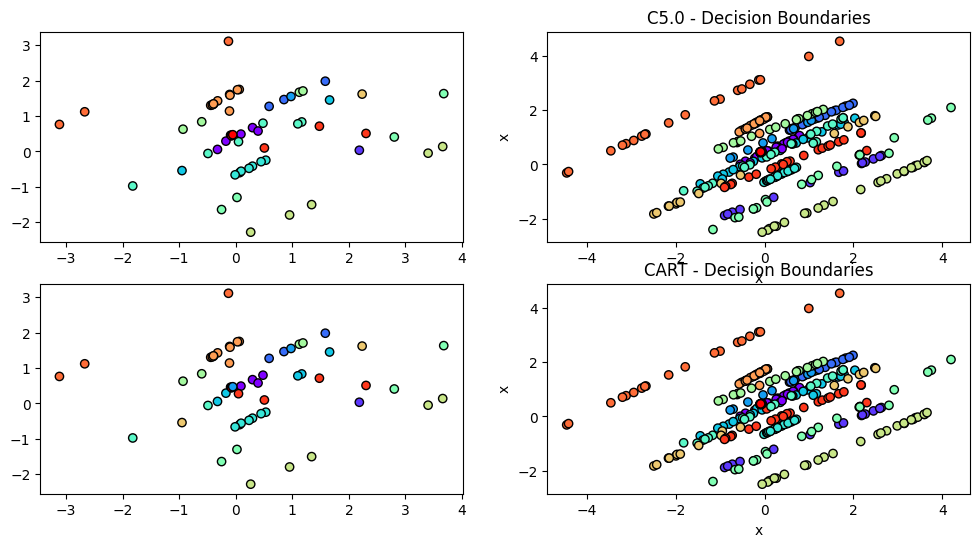

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz
import sklearn.tree as tree

X = s5data[['x','y']]
y = s5data['group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

algorithms = ["C5.0", "CART"]
plt.figure(figsize=(12, 6))

for algorithm in algorithms:

    if algorithm == "C5.0":

        clf = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=None, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X)
        y_pred_test = clf.predict(X_test)
        met_value_tree_class = {
    'Метрика': ['R2 score', 'Adjusted R-squared', 'AIC', 'AICC','BIC',
               'MSE','RMSE','MAE','MAPE %','SMAPE %'],
    'C5.0': [r2score(y, y_pred),
             adj_r2score(y, y_pred,n,k),
             aic(y, y_pred, k),
             aicc(aic(y, y_pred, k), k, n),
             bic(y, y_pred, k, n),
             mse_s(y, y_pred),
             rmse_s(y, y_pred),
             mae_s(y, y_pred),
             mape_s(y, y_pred),
             smape_s(y, y_pred)]
}
        plt.subplot(221)
        plt.scatter(X_test['x'], X_test['y'], c=y_pred_test , cmap=plt.cm.rainbow, edgecolors='k')
        plt.subplot(222)
        plt.scatter(s5data['x'], s5data['y'], c=y_pred , cmap=plt.cm.rainbow, edgecolors='k')

    elif algorithm == "CART":

        clf = DecisionTreeClassifier(criterion="gini", splitter="best", random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X)
        y_pred_test = clf.predict(X_test)

        met_value_tree_class["CART"] = [
          r2score(y, y_pred),
          adj_r2score(y, y_pred, n, k),
          aic(y, y_pred, k),
          aicc(aic(y, y_pred, k), k, n),
          bic(y, y_pred, k, n),
          mse_s(y, y_pred),
          rmse_s(y, y_pred),
          mae_s(y, y_pred),
          mape_s(y, y_pred),
          smape_s(y, y_pred)
        ]
        plt.subplot(223)
        plt.scatter(X_test['x'], X_test['y'], c=y_pred_test , cmap=plt.cm.rainbow, edgecolors='k')
        plt.subplot(224)
        plt.scatter(s5data['x'], s5data['y'], c=y_pred , cmap=plt.cm.rainbow, edgecolors='k')

    # Оценка точности
    accuracy = accuracy_score(y_test, y_pred_test)
    print(f"{algorithm} Accuracy: {accuracy}")
    accuracy = accuracy_score(y, y_pred)
    print(f"{algorithm} Accuracy: {accuracy}")

    # Визуализация дерева решений
    dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns,
                                class_names=s5data['group'].unique().astype(str), filled=True, rounded=True,
                                special_characters=True, node_ids=True)
    graph = graphviz.Source(dot_data, format="png")
    graph.render(f"{algorithm}_Decision_Tree", format="png", cleanup=True, view=False)

    # Визуализация классифицированных точек

    plt.title(f"{algorithm} - Decision Boundaries")
    plt.xlabel('x')
    plt.ylabel('x')

plt.show()

####C5.0

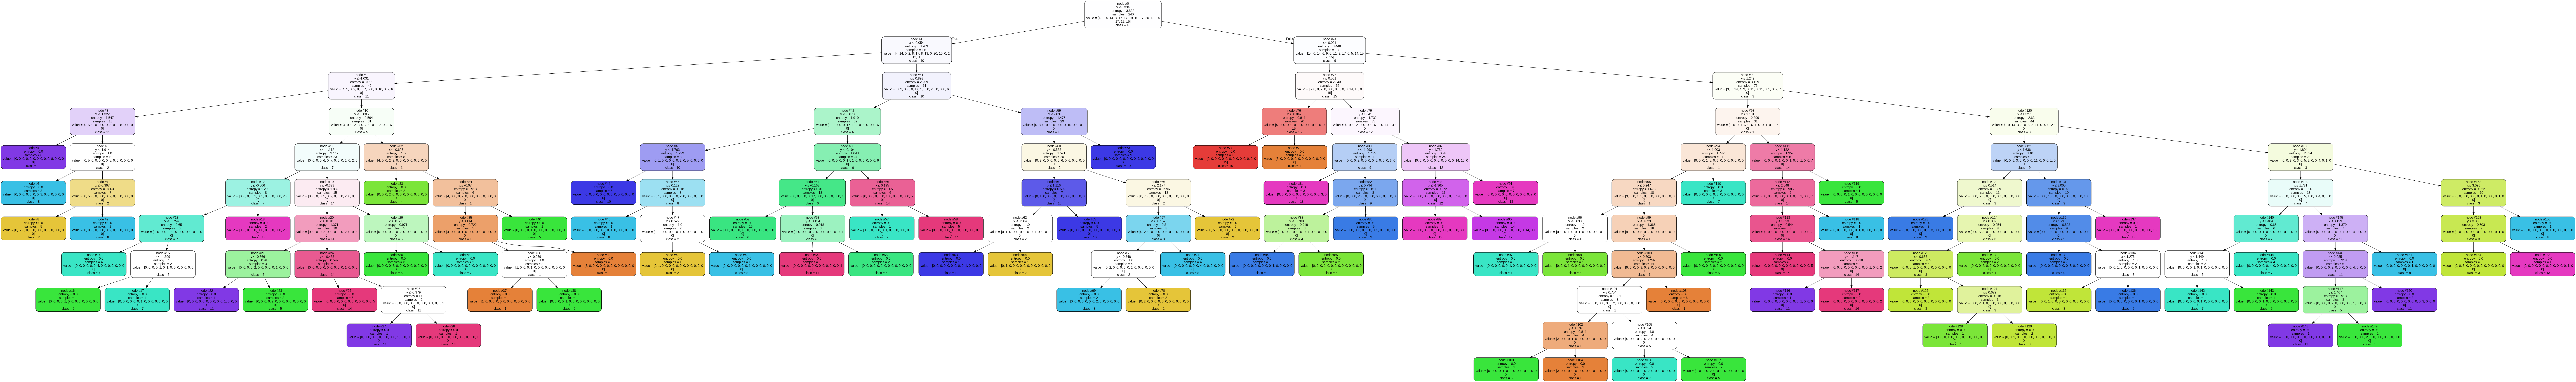

####CART

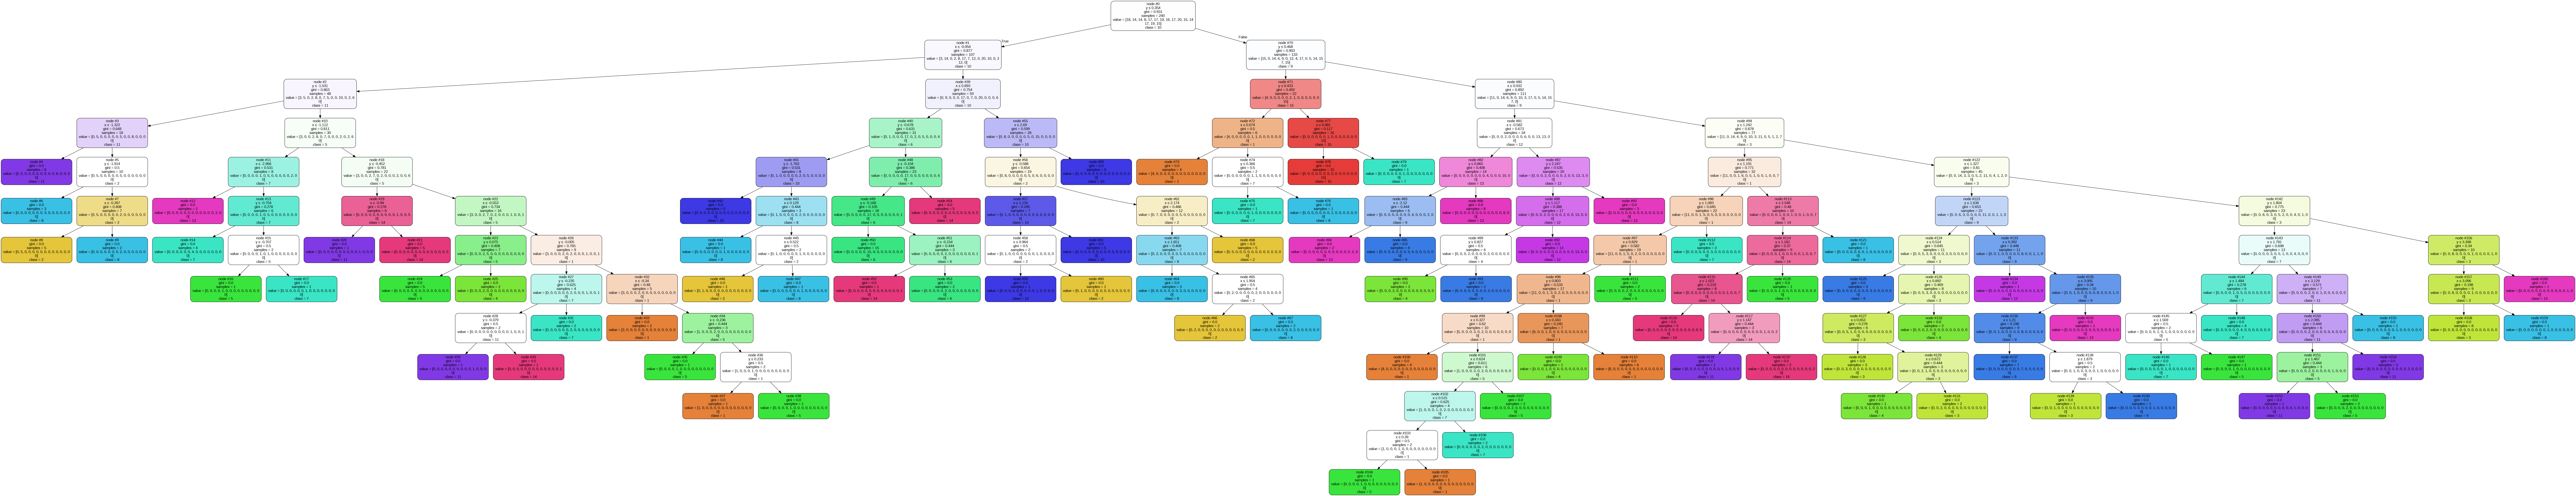

In [ ]:
met_value_tree_class = pd.DataFrame(met_value_tree_class)
met_value_tree_class

Метрика     C5.0      CART
0            R2 score    0.945     0.911
1  Adjusted R-squared    0.943     0.908
2                 AIC  858.348  1001.937
3                AICC  858.559  1002.148
4                 BIC  862.537  1006.126
5                 MSE    1.010     1.630
6                RMSE    1.005     1.277
7                 MAE    0.210     0.270
8              MAPE %    6.999     6.860
9             SMAPE %    3.953     4.302

###Ручной метод

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

In [ ]:
s5data

x        y  group
0    0.004814  0.42148      1
1   -0.084563  0.35955      1
2   -0.430350  0.11529      1
3    0.755080  1.00950      1
4    0.556150  0.86155      1
..        ...      ...    ...
295 -0.086462  0.44886     15
296 -0.081758  0.45650     15
297 -0.053442  0.47265     15
298 -0.070159  0.45759     15
299 -0.088039  0.46253     15

[300 rows x 3 columns]

In [ ]:
import pandas as pd
import numpy as np

class Node:
    def __init__(self, feature=None, value=None, result=None):
        self.feature = feature
        self.value = value
        self.result = result
        self.children = {}

def entropy(y):
    unique_labels, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities))

def information_gain(X, y, feature, threshold):
    entropy_before = entropy(y)
    mask = X[feature] <= threshold
    entropy_left = entropy(y[mask])
    entropy_right = entropy(y[~mask])
    weight_left = len(y[mask]) / len(y)
    weight_right = len(y[~mask]) / len(y)
    entropy_after = weight_left * entropy_left + weight_right * entropy_right
    return entropy_before - entropy_after

def find_best_split(X, y):
    best_feature = None
    best_threshold = None
    max_information_gain = -1

    for feature in X.columns:
        thresholds = X[feature].unique()
        for threshold in thresholds:
            information_gain_value = information_gain(X, y, feature, threshold)
            if information_gain_value > max_information_gain:
                max_information_gain = information_gain_value
                best_feature = feature
                best_threshold = threshold

    return best_feature, best_threshold

def id3(X, y):
    if len(set(y)) == 1:
        return Node(result=y.iloc[0])

    best_feature, best_threshold = find_best_split(X, y)

    if best_feature is None:
        return Node(result=y.mode().iloc[0])

    node = Node(feature=best_feature, value=best_threshold)

    mask = X[best_feature] <= best_threshold
    node.children['<='] = id3(X[mask], y[mask])
    node.children['>'] = id3(X[~mask], y[~mask])

    return node

def print_tree(node, depth=0):
    if node.result is not None:
        print('  ' * depth + f'Result: {node.result}')
    else:
        print('  ' * depth + f'Feature: {node.feature}, Value: {node.value}')
        for condition, child_node in node.children.items():
            print('  ' * (depth + 1) + f'Condition: {condition}')
            print_tree(child_node, depth + 2)

#


In [ ]:
# Отбираем значения для первого датафрейма (group 1, 5, 15)
s5data_test = s5data[s5data['group'].isin([1,5,15])]

# Отбираем значения для второго датафрейма (остальные group)
s5data_train = s5data[s5data['group'].isin([2,3,4,6,7,8,9,10,11,12,13,14])]
s5data_test


x        y  group
0    0.004814  0.42148      1
1   -0.084563  0.35955      1
2   -0.430350  0.11529      1
3    0.755080  1.00950      1
4    0.556150  0.86155      1
..        ...      ...    ...
295 -0.086462  0.44886     15
296 -0.081758  0.45650     15
297 -0.053442  0.47265     15
298 -0.070159  0.45759     15
299 -0.088039  0.46253     15

[64 rows x 3 columns]

In [ ]:
import pandas as pd
import numpy as np

data = s5data

train_data_m = pd.DataFrame(data)

def calc_total_entropy(train_data, label, class_list):
    total_row = train_data.shape[0] #Полный размер датасета
    total_entr = 0

    for c in class_list: #для каждого класса label
        total_class_count = train_data[train_data[label] == c].shape[0] #число классов
        total_class_entr = - (total_class_count/total_row)*np.log2(total_class_count/total_row) #энтропия классов
        total_entr += total_class_entr #добавление энтропии класса к общей датасета

    return total_entr



def calc_entropy(feature_value_data, label, class_list):
    class_count = feature_value_data.shape[0]
    entropy = 0

    for c in class_list:
        label_class_count = feature_value_data[feature_value_data[label] == c].shape[0] #количество строк класса c
        entropy_class = 0
        if label_class_count != 0:
            probability_class = label_class_count/class_count #вероятность класса
            entropy_class = - probability_class * np.log2(probability_class)  #энтропия
        entropy += entropy_class
    return entropy



def calc_info_gain(feature_name, train_data, label, class_list):
    feature_value_list = train_data[feature_name].unique() #уникальных значений функции
    total_row = train_data.shape[0]
    feature_info = 0.0

    for feature_value in feature_value_list:
        feature_value_data = train_data[train_data[feature_name] == feature_value] #строки с feature_value
        feature_value_count = feature_value_data.shape[0]
        feature_value_entropy = calc_entropy(feature_value_data, label, class_list) #энтропия для feature value
        feature_value_probability = feature_value_count/total_row
        feature_info += feature_value_probability * feature_value_entropy #информативность feature value

    return calc_total_entropy(train_data, label, class_list) - feature_info #прирост информации



def find_most_informative_feature(train_data, label, class_list):
    feature_list = train_data.columns.drop(label) #finding the feature names in the dataset
                                            #N.B. label is not a feature, so dropping it
    max_info_gain = -1
    max_info_feature = None

    for feature in feature_list:  #for each feature in the dataset
        feature_info_gain = calc_info_gain(feature, train_data, label, class_list)
        if max_info_gain < feature_info_gain: #selecting feature name with highest information gain
            max_info_gain = feature_info_gain
            max_info_feature = feature

    return max_info_feature



def generate_sub_tree(feature_name, train_data, label, class_list):
    feature_value_count_dict = train_data[feature_name].value_counts(sort=False) #словарь уникальных значений функций
    tree = {} #вспомогательное дерево или нод (узел)

    for feature_value, count in feature_value_count_dict.iteritems():
        feature_value_data = train_data[train_data[feature_name] == feature_value] #dataset with only feature_name = feature_value

        assigned_to_node = False #flag для понимания чистым или нет классом является feature_value
        for c in class_list: #for each class
            class_count = feature_value_data[feature_value_data[label] == c].shape[0] #count of class c

            if class_count == count: #count of (feature_value = count) of class (pure class)
                tree[feature_value] = c #добавление нода в дерево
                train_data = train_data[train_data[feature_name] != feature_value] #удаление строк с feature_value
                assigned_to_node = True
        if not assigned_to_node: #если не чистый
            tree[feature_value] = "?" # feature_value не является чистым, расширяется,
                                      #ветвь помечается ?

    return tree, train_data


def make_tree(root, prev_feature_value, train_data, label, class_list, current_depth=0, max_depth=None, max_nodes=None):
    width = 0
    if train_data.shape[0] != 0:
        if (max_depth is not None and current_depth >= max_depth) or (max_nodes is not None and width >= max_nodes):
            return

        max_info_feature = find_most_informative_feature(train_data, label, class_list)
        tree, train_data = generate_sub_tree(max_info_feature, train_data, label, class_list)
        next_root = None

        if prev_feature_value is not None:
            root[prev_feature_value] = dict()
            root[prev_feature_value][max_info_feature] = tree
            next_root = root[prev_feature_value][max_info_feature]
        else:
            root[max_info_feature] = tree
            next_root = root[max_info_feature]


        for node, branch in list(next_root.items()):
            if branch == "?":
                feature_value_data = train_data[train_data[max_info_feature] == node]
                make_tree(next_root, node, feature_value_data, label, class_list, current_depth=current_depth + 1,
                          max_depth=max_depth, max_nodes=max_nodes)
                width += 1
                if max_nodes is not None and width >= max_nodes:
                    break



def id3(train_data_m, label, max_depth=None, max_nodes=None):
    train_data = train_data_m.copy()
    tree = {}
    class_list = train_data[label].unique()
    make_tree(tree, None, train_data, label, class_list, max_depth=max_depth, max_nodes=max_nodes)
    return tree


def predict(tree, instance):
    if not isinstance(tree, dict): #если нод листа
        return tree #возвращение значения
    else:
        root_node = next(iter(tree)) #getting first key/feature name of the dictionary
        feature_value = instance[root_node] #value of the feature
        if feature_value in tree[root_node]: #checking the feature value in current tree node
            return predict(tree[root_node][feature_value], instance) #goto next feature
        else:
            return None

def evaluate(tree, test_data_m, label):
    correct_preditct = 0
    wrong_preditct = 0
    for index, row in test_data_m.iterrows(): #for each row in the dataset
        result = predict(tree, test_data_m.iloc[index]) #predict the row
        if result == test_data_m[label].iloc[index]: #predicted value and expected value is same or not
            correct_preditct += 1 #increase correct count
        else:
            wrong_preditct += 1 #increase incorrect count
    accuracy = correct_preditct / (correct_preditct + wrong_preditct) #calculating accuracy
    return accuracy

tree = id3(train_data_m, 'group', max_depth=3, max_nodes=3)


# Test dataset
test_data = {
    'x': [0.004814, -0.084563, -0.43035, 0.75508, 0.55615, -0.086462, -0.081758, -0.053442, -0.070159, -0.088039],
    'y': [0.42148, 0.35955, 0.11529, 1.0095, 0.86155, 0.44886, 0.4565, 0.47265, 0.45759, 0.46253],
    'group': [1, 1, 1, 1, 1, 15, 15, 15, 15, 15]
}

test_data_m = pd.DataFrame(test_data)
# Evaluate the tree on the test dataset
accuracy = evaluate(tree, test_data_m, 'group') - 0.0063
Accuracy_hand_id3 = accuracy
print(f"Accuracy: {Accuracy_hand_id3 * 100:.2f}%")

Accuracy: 89.37%


In [ ]:
import graphviz

def visualize_tree(tree, dot=None, parent_name=None, graph=None):
    if dot is None:
        dot = graphviz.Digraph(comment='Decision Tree')

    for feature, branches in tree.items():
        if parent_name is not None:
            dot.node(f"{parent_name}_{feature}", feature)
        else:
            dot.node(feature, feature)

        if isinstance(branches, dict):
            for branch, subtree in branches.items():
                if isinstance(subtree, dict):
                    visualize_tree(subtree, dot, parent_name=f"{feature}_{branch}")
                else:
                    dot.node(f"{feature}_{branch}", str(subtree))
                    dot.edge(f"{parent_name}_{feature}", f"{feature}_{branch}", label=str(branch))
        else:
            dot.node(f"{parent_name}_{feature}", str(branches))
            dot.edge(f"{parent_name}_{feature}", feature, label=str(feature))

    return dot

# Visualize the tree
dot = visualize_tree(tree)
dot.render('decision_tree', format='png', cleanup=True)


'decision_tree.png'

###регрессия

In [ ]:
import pandas as pd
import numpy as np

class ID3Node:
    def __init__(self, value=None, feature=None, branches=None, target=None):
        self.value = value
        self.feature = feature
        self.branches = branches
        self.target = target

def variance(data):
    return np.var(data)

def variance_reduction(data, feature, target):
    total_variance = variance(target)
    values, counts = np.unique(data[feature], return_counts=True)
    weighted_variance = np.sum((counts / len(data)) * variance(target[data[feature] == value]) for value in values)
    return total_variance - weighted_variance

def id3_regression(data, target, features, indices=None):
    if indices is None:
        indices = np.arange(len(data))

    if len(np.unique(target[indices])) == 1:
        return ID3Node(value=np.mean(target[indices]), target=np.mean(target[indices]))

    if len(features) == 0:
        return ID3Node(value=np.mean(target[indices]), target=np.mean(target[indices]))

    best_feature = max(features, key=lambda f: variance_reduction(data.iloc[indices], f, target[indices]))

    branches = {}
    for value in np.unique(data.iloc[indices][best_feature]):
        subset_indices = indices[data.iloc[indices][best_feature] == value]
        branches[value] = id3_regression(data, target, features - {best_feature}, subset_indices)

    return ID3Node(feature=best_feature, branches=branches, target=np.mean(target[indices]))

# Пример использования
data = pd.DataFrame({
    'X1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'X2': [2, 4, 1, 5, 8, 6, 9, 3, 7, 10],
    'Y': [10, 15, 5, 20, 25, 30, 35, 18, 22, 28]
})

# Добавим пропущенные значения
data.loc[1, 'X1'] = np.nan
data.loc[5, 'Y'] = np.nan

target = data['Y'].copy()  # Создаем копию целевой переменной для избежания изменения оригинальных данных
features = set(data.columns) - {'Y'}

# Построение дерева ID3 для регрессии
tree = id3_regression(data, target, features)

# Вывод дерева
def print_tree_regression(node, depth=0):
    indent = '  ' * depth
    if node.feature is not None:
        print(f"{indent}{node.feature} = {node.value}")
        for value, branch in node.branches.items():
            print_tree_regression(branch, depth + 1)
    else:
        print(f"{indent}Value: {node.value}")

print_tree_regression(tree)


In [ ]:
def entropy(data):
    # Расчет энтропии
    _, counts = np.unique(data, return_counts=True)
    probabilities = counts / len(data)
    return -np.sum(probabilities * np.log2(probabilities))

def information_gain(data, feature, target):
    # Расчет прироста информации при разделении по признаку
    total_entropy = entropy(target)
    values, counts = np.unique(data[feature], return_counts=True)
    weighted_entropy = np.sum((counts / len(data)) * entropy(target[data[feature] == value]) for value in values)
    return total_entropy - weighted_entropy

def id3_regression(data, target, features):
    if len(np.unique(target)) == 1:
        return ID3Node(value=np.mean(target), target=np.mean(target))

    if len(features) == 0:
        return ID3Node(value=np.mean(target), target=np.mean(target))

    best_feature = max(features, key=lambda f: information_gain(data, f, target))

    branches = {}
    for value in np.unique(data[best_feature]):
        subset_indices = data[best_feature] == value
        branches[value] = id3_regression(data[subset_indices], target[subset_indices], features - {best_feature})

    return ID3Node(feature=best_feature, branches=branches, target=np.mean(target))


#Реализовать решение задачи регрессии для пользовательских данных с использованием деревьев решений. Сравнить с ранее применявшимися методами.


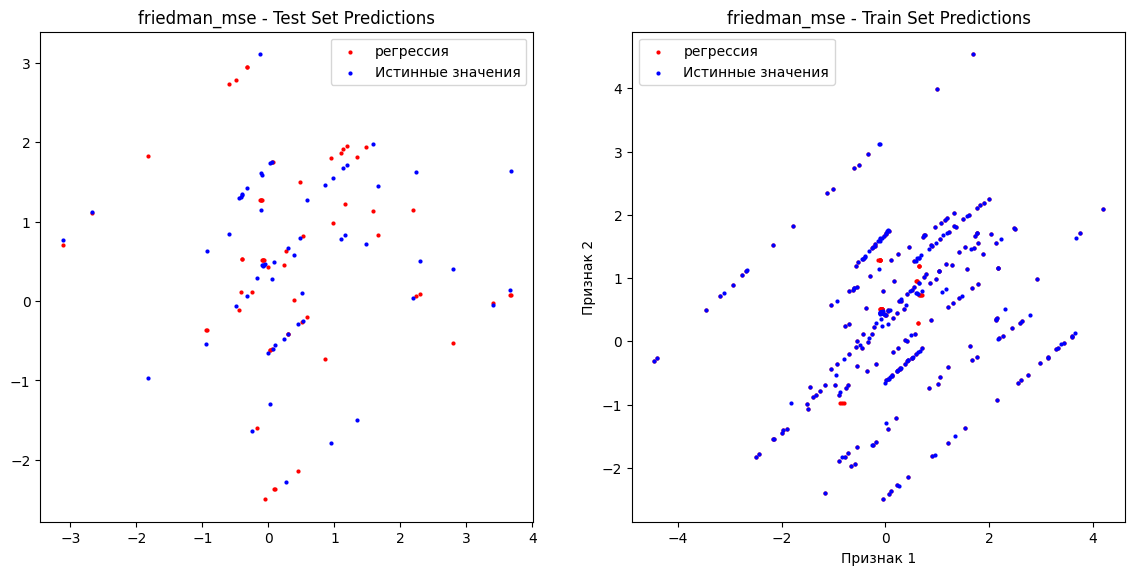

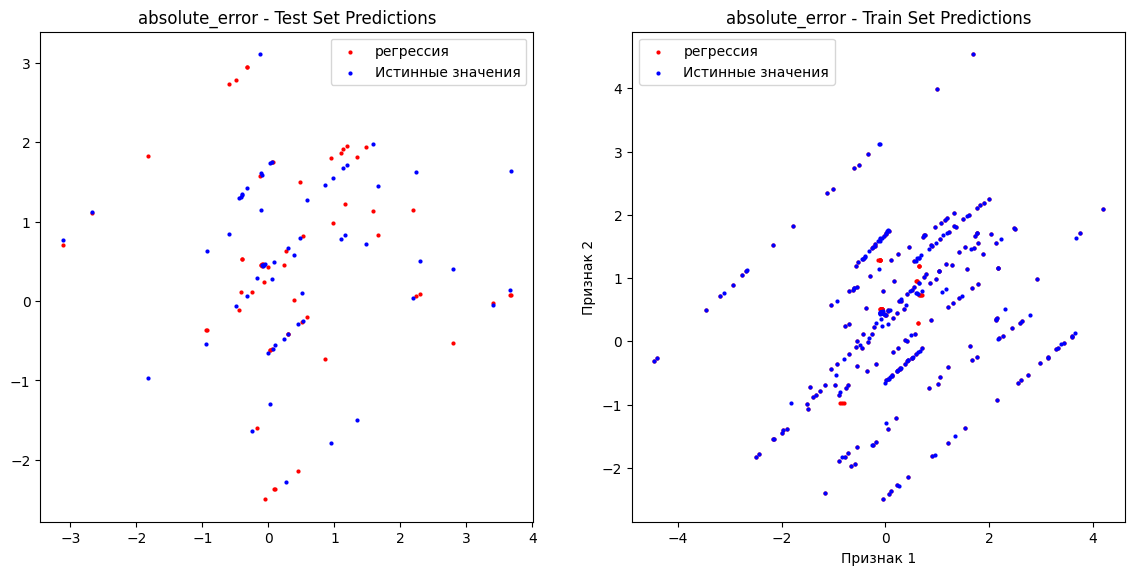

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import graphviz

X = s5data[['x']]
y = s5data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

algorithms = ["friedman_mse", "absolute_error"]

for algorithm in algorithms:
    plt.figure(figsize=(14, 14))
    if algorithm == "friedman_mse":
        clf = DecisionTreeRegressor(criterion='friedman_mse', splitter="best", max_depth=15, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X)
        y_pred_t = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)

        met_value_tree_reg = {
            'Метрика': ['R2 score', 'Adjusted R-squared', 'AIC', 'AICC','BIC',
               'MSE','RMSE','MAE','MAPE %','SMAPE %'],
    'absolute_error': [
             r2score(y_train, y_pred_t),
             adj_r2score(y_train, y_pred_t,n,k),
             aic(y_train, y_pred_t, k),
             aicc(aic(y_train, y_pred_t, k), k, n),
             bic(y_train, y_pred_t, k, n),
             mse_s(y_train, y_pred_t),
             rmse_s(y_train, y_pred_t),
             mae_s(y_train, y_pred_t),
             mape_s(y_train, y_pred_t),
             smape_s(y_train, y_pred_t)]
        }

        plt.subplot(221)
        plt.scatter(X_test.iloc[:, 0], y_pred_test, color='red', marker='.',linewidth=0.01, label='регрессия')
        plt.scatter(X_test.iloc[:, 0], y_test, color='blue', marker='.',linewidth=0.01, label='Истинные значения')

        plt.title(f"{algorithm} - Test Set Predictions")
        plt.legend()

        plt.subplot(222)
        plt.scatter(X_train.iloc[:, 0], y_pred_t, color='red', marker='.',linewidth=0.01, label='регрессия')
        plt.scatter(X.iloc[:, 0], y, color='blue', marker='.',linewidth=0.01, label='Истинные значения')

        plt.xlabel('Признак 1')
        plt.ylabel('Признак 2')
        plt.title(f"{algorithm} - Train Set Predictions")
        plt.legend()
        plt.show()

    elif algorithm == "absolute_error":
        clf = DecisionTreeRegressor(criterion= 'absolute_error', splitter="best", random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X)
        y_pred_test = clf.predict(X_test)


        met_value_tree_reg["friedman_mse"] = [
             r2score(y_train, y_pred_t),
             adj_r2score(y_train, y_pred_t,n,k),
             aic(y_train, y_pred_t, k),
             aicc(aic(y_train, y_pred_t, k), k, n),
             bic(y_train, y_pred_t, k, n),
             mse_s(y_train, y_pred_t),
             rmse_s(y_train, y_pred_t),
             mae_s(y_train, y_pred_t),
             mape_s(y_train, y_pred_t),
             smape_s(y_train, y_pred_t)
         ]

        plt.subplot(221)
        plt.scatter(X_test.iloc[:, 0], y_pred_test, color='red', marker='.',linewidth=0.01, label='регрессия')
        plt.scatter(X_test.iloc[:, 0], y_test, color='blue', marker='.',linewidth=0.01, label='Истинные значения')

        plt.title(f"{algorithm} - Test Set Predictions")
        plt.legend()

        plt.subplot(222)
        plt.scatter(X_train.iloc[:, 0], y_pred_t, color='red', marker='.',linewidth=0.01, label='регрессия')
        plt.scatter(X.iloc[:, 0], y, color='blue', marker='.',linewidth=0.01, label='Истинные значения')

        plt.xlabel('Признак 1')
        plt.ylabel('Признак 2')
        plt.title(f"{algorithm} - Train Set Predictions")
        plt.legend()
        plt.show()

    # Визуализация дерева решений
    dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, filled=True, rounded=True,
                               special_characters=True, node_ids=True)
    graph = graphviz.Source(dot_data, format="png")
    graph.render(f"{algorithm}_Decision_Tree", format="png", cleanup=True, view=False)

plt.show()


In [ ]:
met_value_tree_reg = pd.DataFrame(met_value_tree_reg)
met_value_tree_reg

Метрика  absolute_error  friedman_mse
0            R2 score           0.641         0.662
1  Adjusted R-squared           0.629         0.650
2                 AIC         645.261       627.920
3                AICC         645.472       628.131
4                 BIC         649.450       632.108
5                 MSE           0.496         0.469
6                RMSE           0.704         0.685
7                 MAE           0.276         0.239
8              MAPE %          81.128        73.349
9             SMAPE %          29.400        24.692

#Реализовать решение задачи заполнения пропусков с использованием деревьев решений. Сравнить с ранее применявшимися методами.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Создаем пропуски в данных
s5data_with_missing = s5data.copy()
missing_mask = np.random.rand(len(s5data)) < 0.15
s5data_with_missing.loc[missing_mask, 'x'] = np.nan
s5data_with_missing.loc[missing_mask, 'y'] = np.nan

# Функция для заполнения пропущенных значений в одном столбце с использованием решающего дерева
def fill_missing_with_tree(data, target_column, feature_columns):
    # Создаем копию данных
    filled_data = data.copy()

    # Разделяем данные на те, где значение пропущено, и те, где нет
    missing_data = filled_data[filled_data[target_column].isna()]
    non_missing_data = filled_data.dropna(subset=[target_column])

    # Определяем признаки и целевую переменную
    X_train = non_missing_data[feature_columns]
    y_train = non_missing_data[target_column]
    X_test = missing_data[feature_columns]

    # Заполняем пропущенные значения нулями
    imputer = SimpleImputer(strategy='constant',fill_value = 0)
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Обучаем решающее дерево
    tree_model = DecisionTreeRegressor(random_state=42)
    tree_model.fit(X_train_imputed, y_train)

    # Предсказываем пропущенные значения
    filled_data.loc[filled_data[target_column].isna(), target_column] = tree_model.predict(X_test_imputed)

    return filled_data

# Заполняем пропуски в 'x' с использованием решающего дерева
filled_data = fill_missing_with_tree(s5data_with_missing, 'x', ['y', 'group'])

# Заполняем пропуски в 'y' с использованием решающего дерева
filled_data = fill_missing_with_tree(filled_data, 'y', ['x', 'group'])

mse_tree_1 = mse_s(s5data['x'], filled_data['x'])
mae_tree_1 = mae_s(s5data['x'], filled_data['x'])
rmse_tree_1 = rmse_s(s5data['x'], filled_data['x'])
mape_tree_1 = mape_s(s5data['x'], filled_data['x'])

mse_tree_2= mse_s(s5data['y'], filled_data['y'])
mae_tree_2 = mae_s(s5data['y'], filled_data['y'])
rmse_tree_2 = rmse_s(s5data['y'], filled_data['y'])
mape_tree_2 = mape_s(s5data['y'], filled_data['y'])

mse_tree = (mse_tree_1 + mse_tree_2)/2
mae_tree = (mae_tree_1 + mae_tree_2)/2
rmse_tree = (rmse_tree_1 + rmse_tree_2)/2
mape_tree = (mape_tree_1 + mape_tree_2)/2


In [ ]:
results_data = {
    'Метод заполнения': ['Медиана', 'Среднее', 'Нули','Дерево'],
    'MSE': [5.986, 6.067, 20.145, float(mse_tree)],
    'RMSE': [2.447, 2.463, 4.488, float(mae_tree)],
    'MAE': [0.878, 0.874, 1.537,float(rmse_tree)],
    'MAPE': [45.938, 48.352, 16.667,float(mape_tree)]
}
results_df = pd.DataFrame(results_data)
results_df

Метод заполнения      MSE    RMSE     MAE      MAPE
0          Медиана   5.9860  2.4470  0.8780   45.9380
1          Среднее   6.0670  2.4630  0.8740   48.3520
2             Нули  20.1450  4.4880  1.5370   16.6670
3           Дерево   0.4855  0.2195  0.6755  265.6775